<a href="https://colab.research.google.com/github/Bhavika2210/Prediction-of-Car-Price/blob/main/Car_Price_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [69]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

In [2]:
data=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/cars_sampled.csv")
sns.set(rc={"figure.figsize": (11.7,8.27)})

In [3]:
cars=data.copy()
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50001 entries, 0 to 50000
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   dateCrawled          50001 non-null  object
 1   name                 50001 non-null  object
 2   seller               50001 non-null  object
 3   offerType            50001 non-null  object
 4   price                50001 non-null  int64 
 5   abtest               50001 non-null  object
 6   vehicleType          44813 non-null  object
 7   yearOfRegistration   50001 non-null  int64 
 8   gearbox              47177 non-null  object
 9   powerPS              50001 non-null  int64 
 10  model                47243 non-null  object
 11  kilometer            50001 non-null  int64 
 12  monthOfRegistration  50001 non-null  int64 
 13  fuelType             45498 non-null  object
 14  brand                50001 non-null  object
 15  notRepairedDamage    40285 non-null  object
 16  date

In [4]:
cars.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,postalCode
count,5.000100e+04,50001.000000,50001.000000,50001.000000,50001.000000,50001.000000
mean,6.559865e+03,2005.544229,116.496130,125613.687726,5.743725,50775.216696
std,8.581847e+04,122.991832,230.567709,40205.234483,3.711345,25743.701933
min,0.000000e+00,1000.000000,0.000000,5000.000000,0.000000,1067.000000
25%,1.150000e+03,1999.000000,69.000000,125000.000000,3.000000,30559.000000
50%,2.950000e+03,2003.000000,105.000000,150000.000000,6.000000,49504.000000
75%,7.190000e+03,2008.000000,150.000000,150000.000000,9.000000,71404.000000
max,1.234568e+07,9999.000000,19312.000000,150000.000000,12.000000,99998.000000


In [5]:
#To change the scientific notation format
pd.set_option('display.float_format', lambda x: '%.3f'% x)
cars.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,postalCode
count,50001.000,50001.000,50001.000,50001.000,50001.000,50001.000
mean,6559.865,2005.544,116.496,125613.688,5.744,50775.217
std,85818.470,122.992,230.568,40205.234,3.711,25743.702
min,0.000,1000.000,0.000,5000.000,0.000,1067.000
25%,1150.000,1999.000,69.000,125000.000,3.000,30559.000
50%,2950.000,2003.000,105.000,150000.000,6.000,49504.000
75%,7190.000,2008.000,150.000,150000.000,9.000,71404.000
max,12345678.000,9999.000,19312.000,150000.000,12.000,99998.000


In [7]:
# to see all the columns
pd.set_option('display.max_columns',500)
cars.describe()


,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,postalCode
count,50001.000,50001.000,50001.000,50001.000,50001.000,50001.000
mean,6559.865,2005.544,116.496,125613.688,5.744,50775.217
std,85818.470,122.992,230.568,40205.234,3.711,25743.702
min,0.000,1000.000,0.000,5000.000,0.000,1067.000
25%,1150.000,1999.000,69.000,125000.000,3.000,30559.000
50%,2950.000,2003.000,105.000,150000.000,6.000,49504.000
75%,7190.000,2008.000,150.000,150000.000,9.000,71404.000
max,12345678.000,9999.000,19312.000,150000.000,12.000,99998.000


In [8]:
#to drop some columns, firs tmake a list of them and then follow:
col=['name','dateCrawled','postalCode','lastSeen','dateCreated']

cars=cars.drop(col,axis=1)

In [9]:
# dropping the duplicates, keeping the first occurence
cars.drop_duplicates(keep='first',inplace=True)

In [10]:
cars.shape

(49531, 14)

In [11]:
# to check for null values
cars.isnull().sum()

seller                    0
offerType                 0
price                     0
abtest                    0
vehicleType            5152
yearOfRegistration        0
gearbox                2765
powerPS                   0
model                  2730
kilometer                 0
monthOfRegistration       0
fuelType               4467
brand                     0
notRepairedDamage      9640
dtype: int64

In [13]:
year_wisecounts=cars['yearOfRegistration'].value_counts().sort_index()
sum(cars['yearOfRegistration']>2018)


26

In [14]:
sum(cars['yearOfRegistration']<1950)

38

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


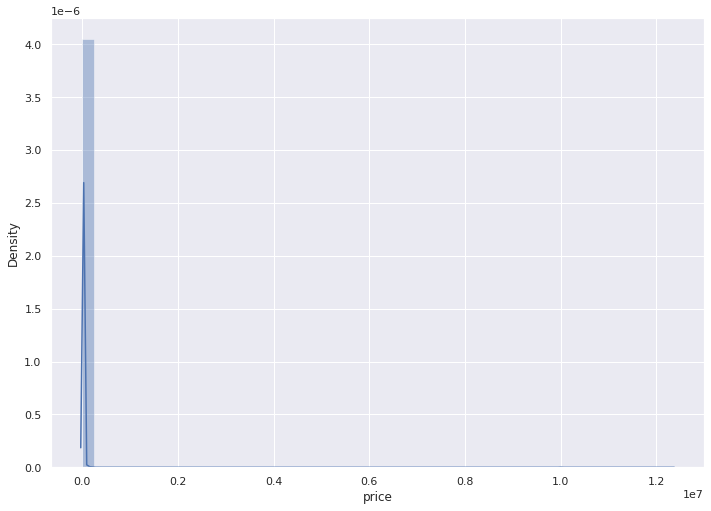

In [15]:
price_counts=cars['price'].value_counts().sort_index()
sns.distplot(cars['price'])

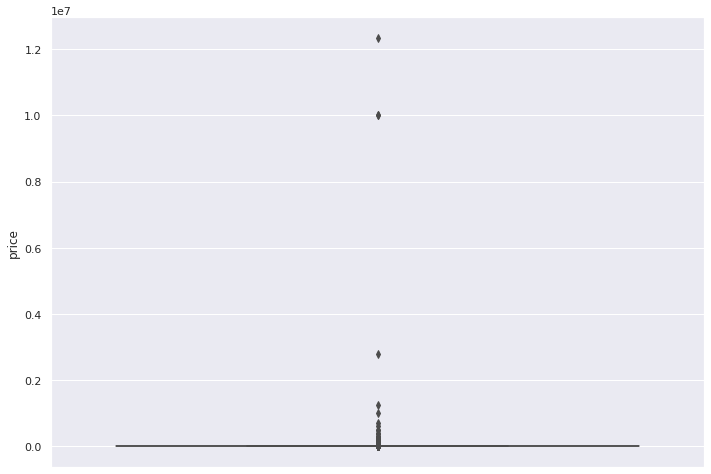

In [16]:
sns.boxplot(y=cars['price'])

In [17]:

sum(cars['price']>150000)

34

In [18]:
sum(cars['price']<100)


1748

In [20]:
power_counts=cars['powerPS'].value_counts().sort_index()
print (power_counts)

0        5533
1           3
2           2
3           2
4           4
         ... 
15033       1
16011       1
16312       1
19211       1
19312       1
Name: powerPS, Length: 460, dtype: int64


In [21]:
sum(cars['powerPS']>500)

115

In [22]:
sum(cars['powerPS']<10)


5565

In [23]:
# Working range of the data
cars=cars[(cars.yearOfRegistration <=2018)&(cars.yearOfRegistration>=1950)&
          (cars.price<=150000) &(cars.price >=100)&(cars.powerPS<=500) &
          (cars.powerPS>=10)]

In [24]:
# to get the age of the car as of 2018, we subtract the year of registration
# from 2018 and divide months by 12, to get the month in decimal 

cars['age']= 2018-cars['yearOfRegistration'] + (cars['monthOfRegistration'])/12
print(cars['age'])

0       15.250
1       13.500
2       15.917
3       13.000
4       10.917
         ...  
49991   14.667
49992   20.750
49993   19.667
49995   17.250
50000   12.833
Name: age, Length: 42772, dtype: float64


In [25]:
cars['age']=round(cars['age'],2)
cars['age'].describe()
# Average age is 14.873 years 
# mean and median(14.830) are not very far off which means data isnt much skewed

count   42772.000
mean       14.873
std         7.093
min         0.000
25%        10.330
50%        14.830
75%        19.170
max        67.750
Name: age, dtype: float64

In [26]:
#Now we dont require year and month of registration , so lets drop that off
col2=['yearOfRegistration','monthOfRegistration']
cars=cars.drop(col2,axis=1)

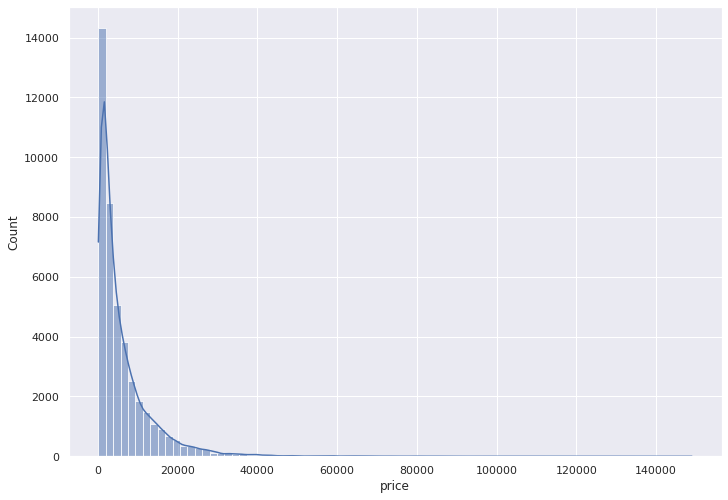

In [28]:
# VISUALISATION
sns.histplot(cars['price'],bins=80,kde=True)


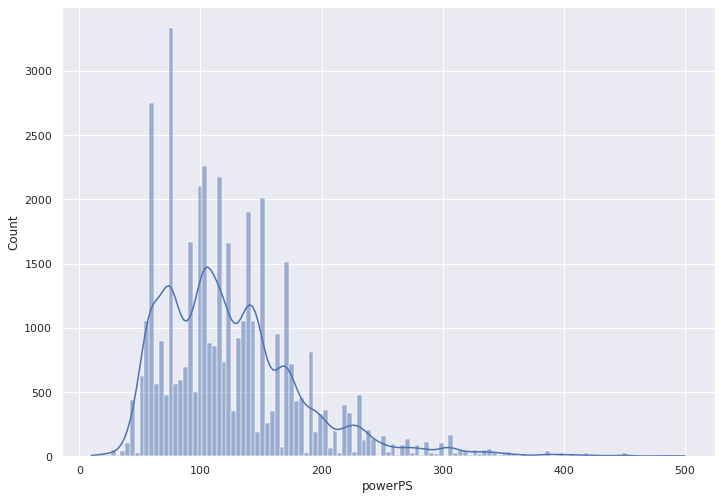

In [29]:
sns.histplot(cars['powerPS'],kde=True)

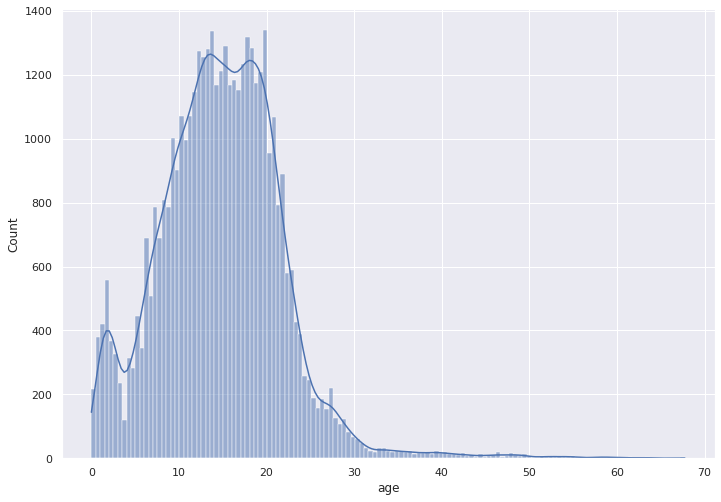

In [30]:
sns.histplot(cars['age'],kde=True)

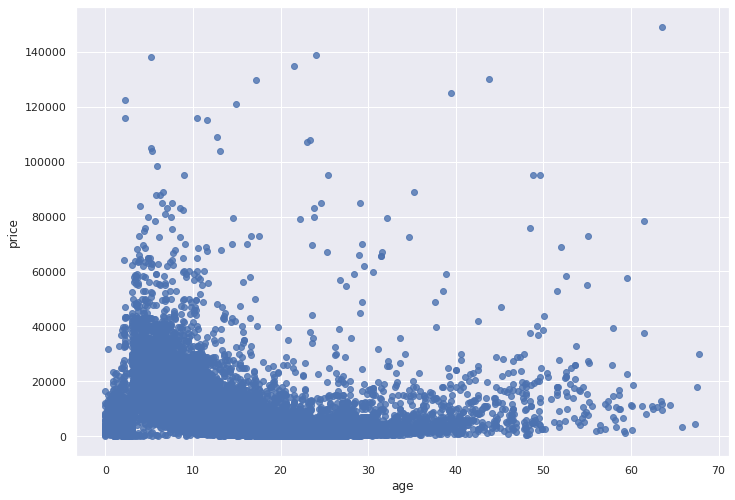

In [31]:


sns.regplot(x='age',y='price',scatter=True,data=cars,fit_reg=False)


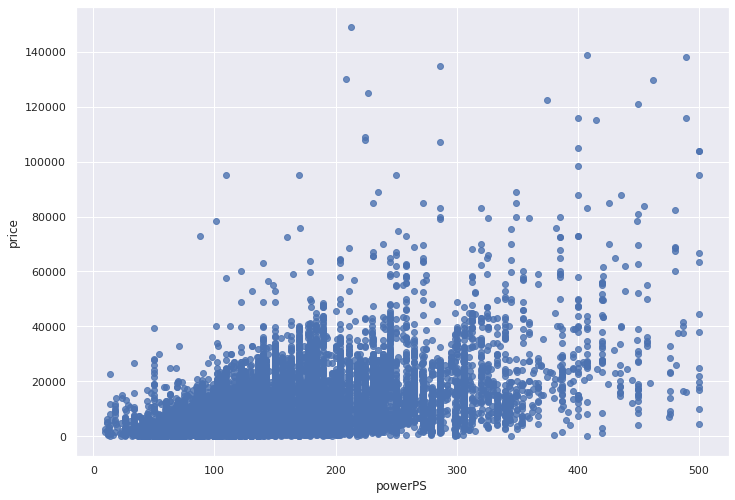

In [32]:
sns.regplot(x='powerPS',y='price',scatter=True,data=cars,fit_reg=False)

In [33]:
cars['seller'].value_counts()
pd.crosstab(cars['seller'],columns='count', normalize=True)
# commercial car is just 1, hence insignificant

col_0,count
seller,
commercial,0.000
private,1.000


In [34]:
cars['offerType'].value_counts()
# no order is a request, hence this variable is of not much use

offer    42772
Name: offerType, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


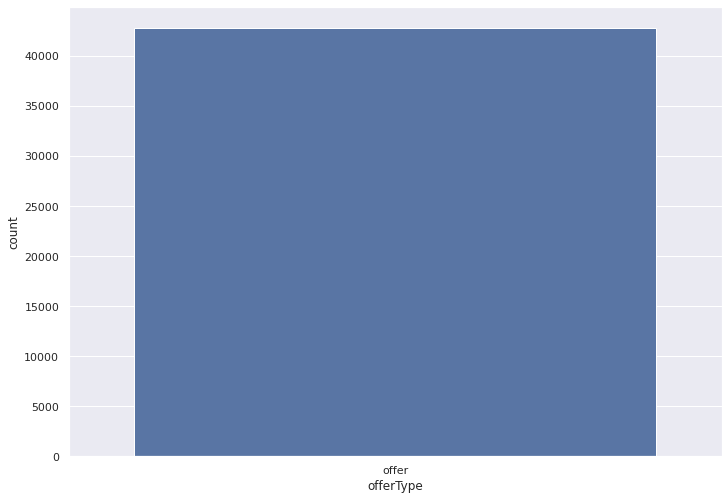

In [35]:
sns.countplot(cars['offerType'],data=cars)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


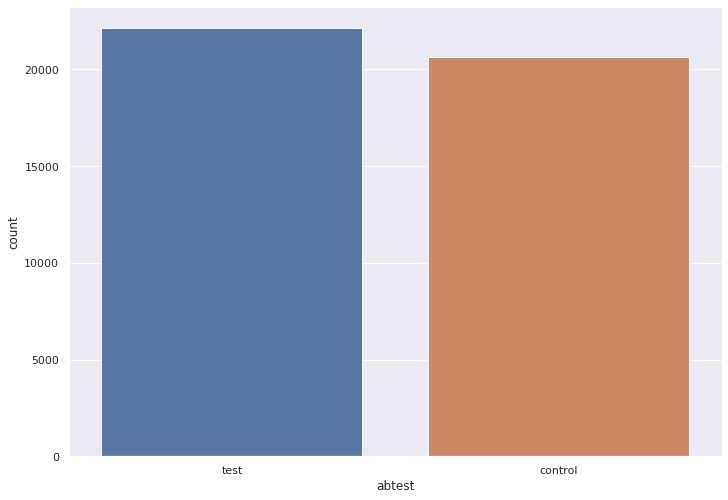

In [36]:
cars['abtest'].value_counts()
sns.countplot(cars['abtest'],data=cars)
# almost equal : test and control

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


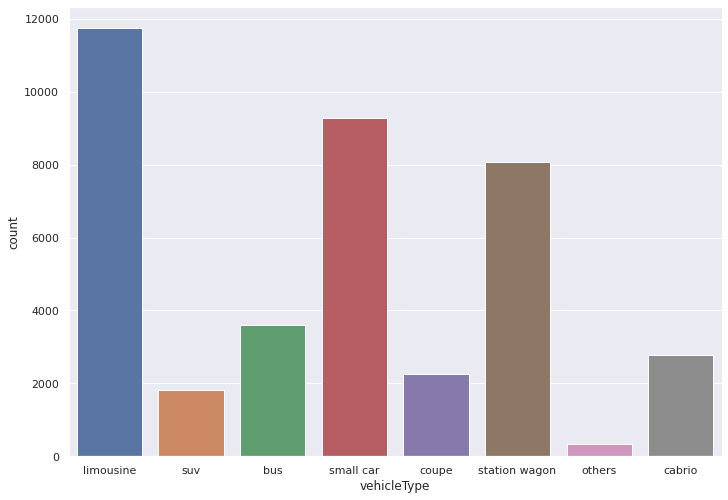

In [37]:

cars['vehicleType'].value_counts()
# maximum :11746 (Limousine) , minimum :1813 (suv), others: 326
sns.countplot(cars['vehicleType'],data=cars)

In [38]:
pd.crosstab(cars['vehicleType'],columns='counts2',normalize=True)

col_0,counts2
vehicleType,
bus,0.090
cabrio,0.070
coupe,0.057
limousine,0.294
others,0.008
small car,0.233
station wagon,0.202
suv,0.045


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


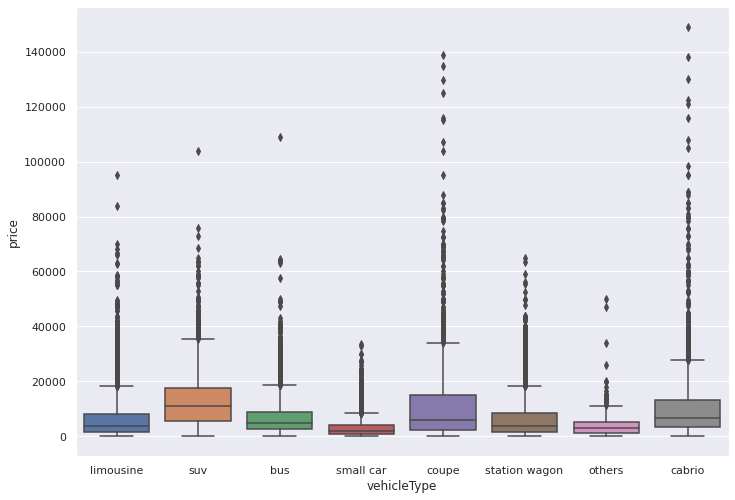

In [39]:
sns.boxplot('vehicleType', y='price',data=cars)

In [40]:
cars['gearbox'].value_counts()
cars['gearbox'].describe()
pd.crosstab(cars['gearbox'],columns='counts3',normalize=True)

col_0,counts3
gearbox,
automatic,0.224
manual,0.776


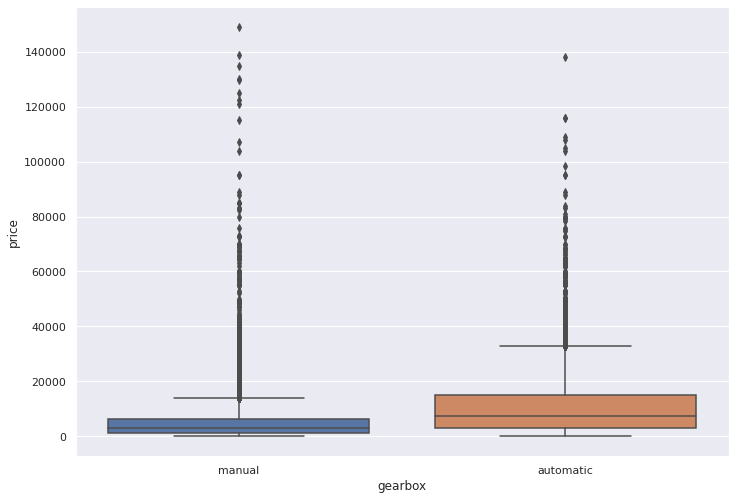

In [41]:

#to find the effect of gearbox on price
sns.boxplot(x='gearbox',y='price',data=cars)
# conclusion: automatic cars are more expensive generally

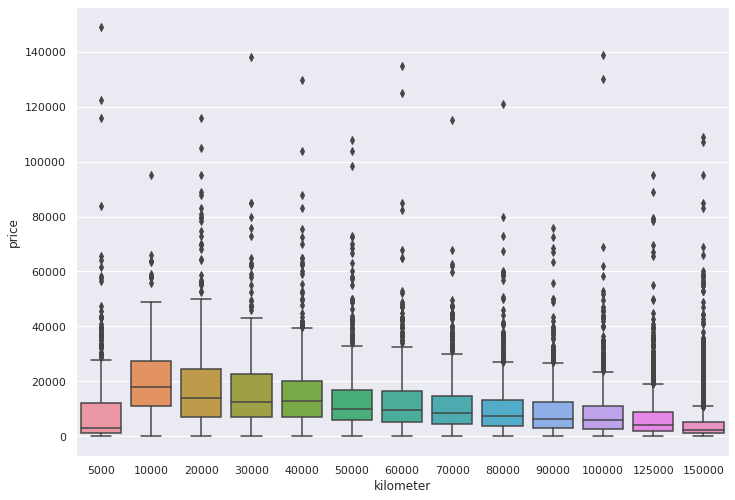

In [42]:
cars['kilometer'].value_counts()
sns.boxplot(x='kilometer',y='price',data=cars)

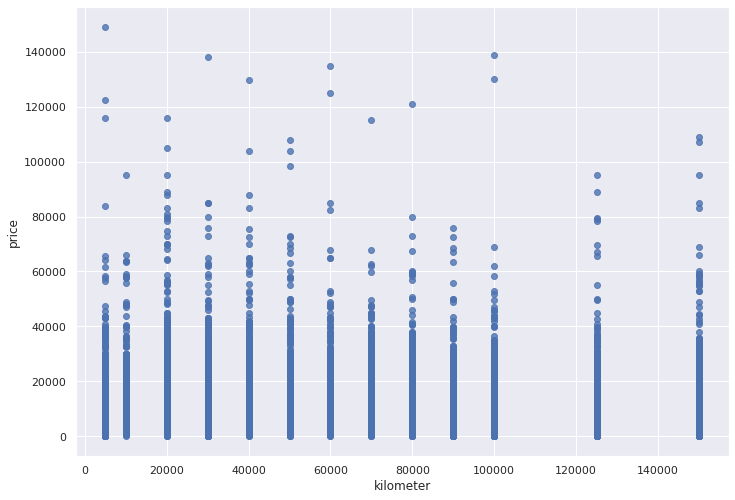

In [43]:
sns.regplot(x='kilometer',y='price',data=cars,scatter=True,fit_reg=False)

In [44]:
cars['fuelType'].value_counts()
pd.crosstab(cars['fuelType'],columns='countfuel',normalize=True)
# petrol in 66 % diesel in 32 %

col_0,countfuel
fuelType,
cng,0.002
diesel,0.320
electro,0.000
hybrid,0.001
lpg,0.017
other,0.000
petrol,0.660


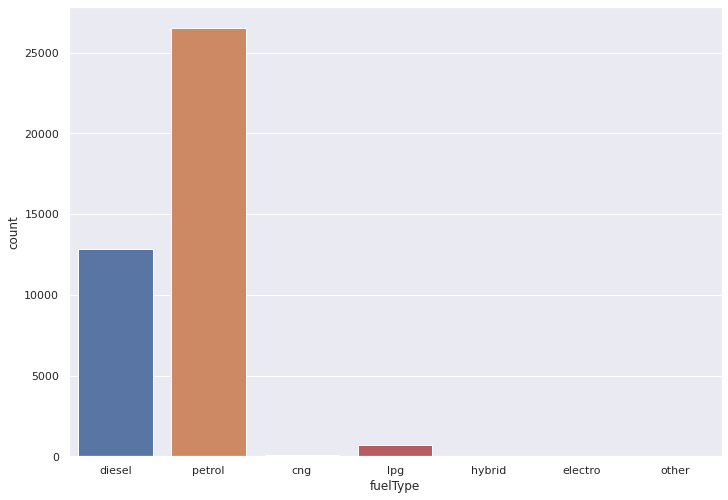

In [45]:

sns.countplot(x='fuelType', data=cars)

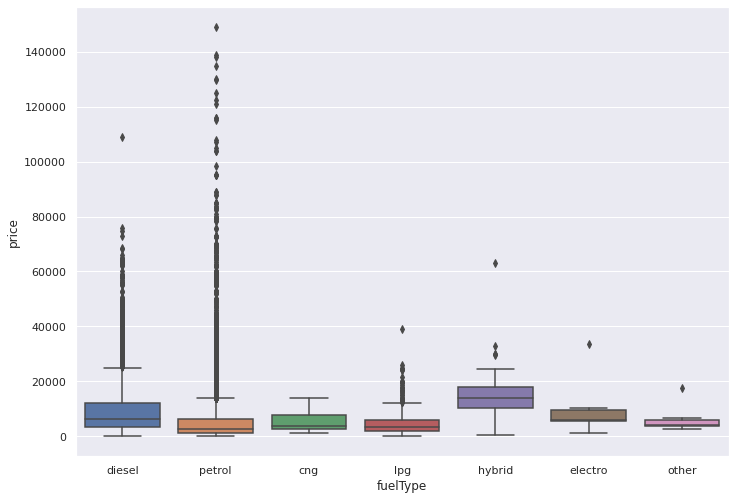

In [46]:
sns.boxplot(x='fuelType',y='price',data=cars)

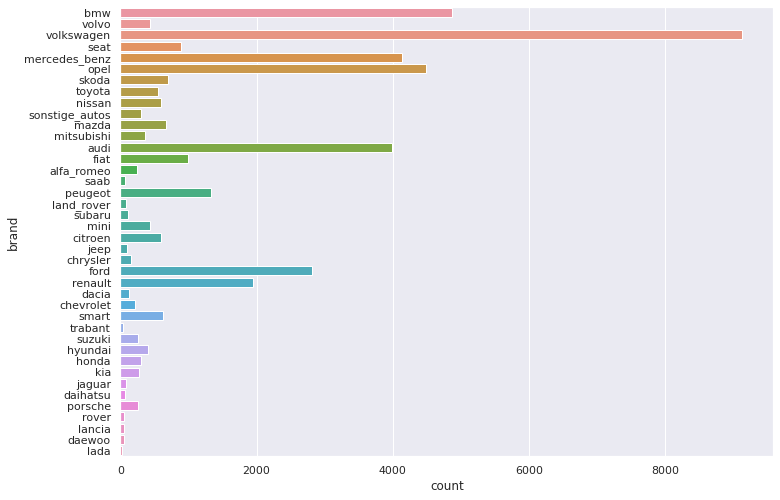

In [47]:
cars['brand'].value_counts()
sns.countplot(y='brand', data=cars)

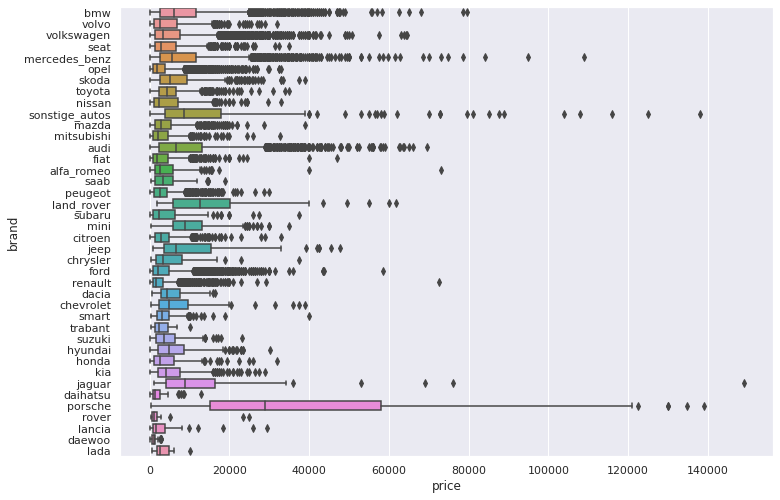

In [48]:

sns.boxplot(y='brand',x='price',data=cars)

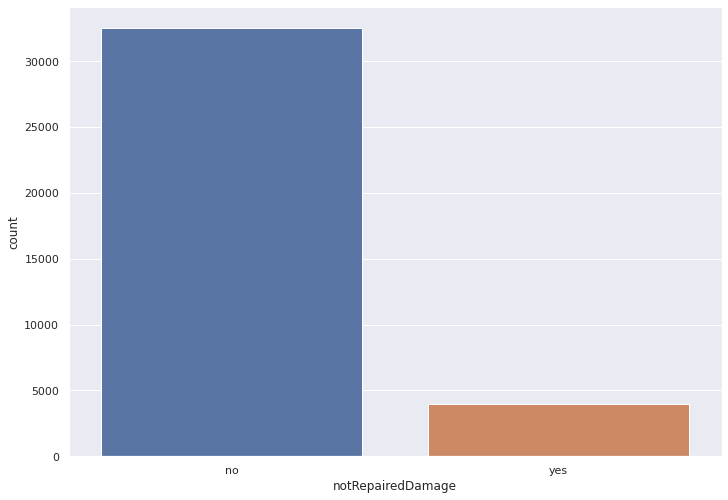

In [49]:
cars['notRepairedDamage'].value_counts()
sns.countplot(x='notRepairedDamage',data=cars)

In [50]:

pd.crosstab(cars['notRepairedDamage'],columns='countsrepair',normalize=True)
# 89.1 % have been repaired and 10.9 % are left 

col_0,countsrepair
notRepairedDamage,
no,0.891
yes,0.109


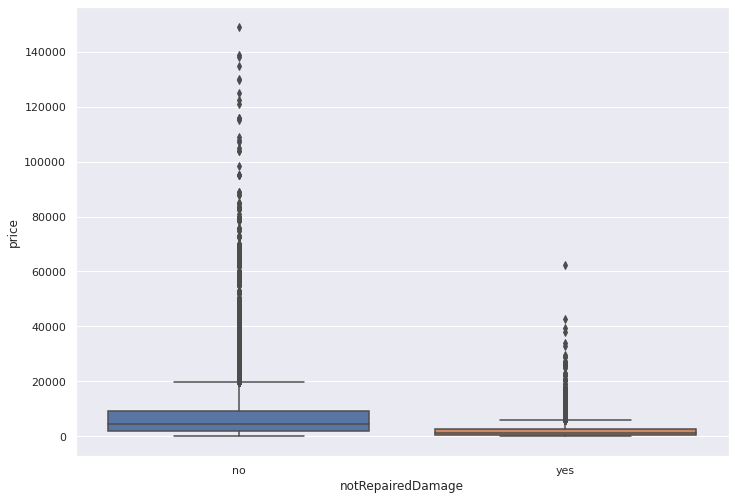

In [51]:
sns.boxplot(x='notRepairedDamage',y='price',data=cars)
# 'no' has higher price as it does not require any repair


In [52]:
# we remove the useless attributes
remcol=['seller','abtest','offerType']
cars=cars.drop(remcol,axis=1)
car_copy=cars.copy()

In [54]:
#DERIVING CORRELATIONS:
cars_select=cars.select_dtypes(exclude=object)
#only numerical data is being focused upon
correlation=cars_select.corr()
print(correlation)

           price  powerPS  kilometer    age
price      1.000    0.575     -0.440 -0.336
powerPS    0.575    1.000     -0.016 -0.151
kilometer -0.440   -0.016      1.000  0.292
age       -0.336   -0.151      0.292  1.000


There is a strong dependency of price on powerPS
 More the powerPS more will be the price of the car.
for model building, we work on two types of data :
 when we omit the entire row if it has any missing value
 we manage the missing values and use that row

In [55]:
cars_omit=cars.dropna(axis=0)
# to convert the data into 0s and 1s:
cars_omit=pd.get_dummies(cars_omit,drop_first=True)


In [56]:
# to seperate the input and output value
x1=cars_omit.drop(['price'],axis=1,inplace=False)
y1=cars_omit['price']

In [57]:
y1=np.log(y1) #better because the range of our data is high

In [58]:
x_train,x_test,y_train,y_test= train_test_split(x1,y1,test_size=0.3,random_state=3)
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(23018, 300) (23018,) (9866, 300) (9866,)


In [59]:
base=np.mean(y_test)
print(base)

8.249615787653337


In [60]:
base=np.repeat(base,len(y_test))

In [61]:
base_rmse=np.sqrt(mean_squared_error(y_test,base))
print(base_rmse) # 1.127

1.1274483657478247


In [62]:
lr=LinearRegression(fit_intercept=True)
model1=lr.fit(x_train,y_train)
pred=lr.predict(x_test)

In [63]:
mse1 =mean_squared_error(y_test, pred)
rmse1=np.sqrt(mse1)

0.5455481266513843


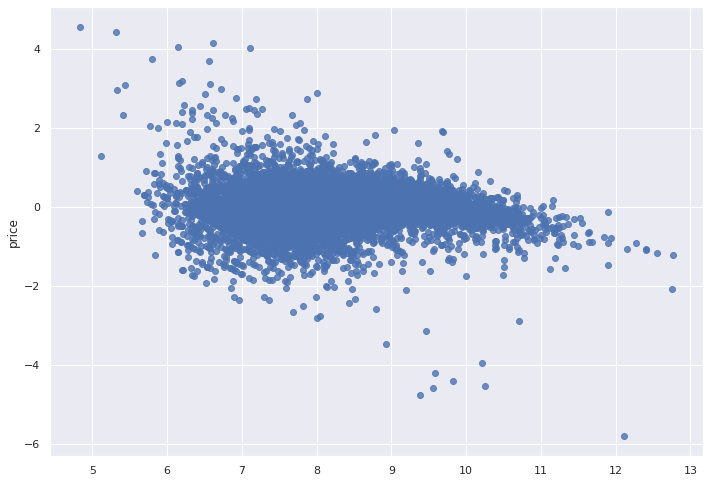

In [64]:
print(rmse1)  # 0.5455
residuals= y_test- pred
sns.regplot(x=pred,y=residuals,scatter=True,fit_reg=False)

In [65]:
# RANDOM FOREST:
rf=RandomForestRegressor(n_estimators=100,max_features='auto',max_depth=100,
                         min_samples_split=10,min_samples_leaf=4,random_state=1)

In [66]:
m2=rf.fit(x_train,y_train)
pred2=rf.predict(x_test)

In [67]:
rf_mse= mean_squared_error(y_test, pred2)
rf_rmse=np.sqrt(rf_mse)
print(rf_rmse)

0.4360736289370223


Based on a rule of thumb, it can be said that RMSE values between 0.2 and 0.5 shows that the model can relatively predict the data accurately. In addition, Adjusted R-squared more than 0.75 is a very good value for showing the accuracy. In some cases, Adjusted R-squared of 0.4 or more is acceptable as well.